## Movie_Pro_4_HK

* Student name: Hera K.
* Student pace: full time
* Scheduled project review date/time: 05/05/2023
* Instructor name: Daniel Burdeno
* Blog post URL:


# Overview

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.

# Business Problem

# Data 

- How do you determine which users or items are similar to one another?
- Given that you know which users are similar, how do you determine the rating that a user would give to an item based on the ratings of similar users?
- How do you measure the accuracy of the ratings you calculate?

TASK : Build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies

In [1]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 
import datetime
from random import gauss as gs, uniform as uni, seed

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
from scipy import stats
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #splitting the dataset into test-train
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, FunctionTransformer
from scipy import stats
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_link = pd.read_csv('./ml-latest-small/links.csv')
df_link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [3]:
# Movies, title, genres 

df_mov= pd.read_csv('./ml-latest-small/movies.csv')
df_mov

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
# Ratings

df_rat= pd.read_csv('./ml-latest-small/ratings.csv')
df_rat

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
# Tags

df_tag= pd.read_csv('./ml-latest-small/tags.csv')
df_tag

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [6]:
# Information (null info, columns name) about the all files 

print(df_link.info())
print(df_mov.info())
print(df_rat.info())
print(df_tag.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 no

In [7]:
# Checked dupliacted columns 

print("df_link['movieId'] dupliacted columns number : {}".format(df_link['movieId'].duplicated().sum()))
print("df_mov ['movieId'] dupliacted columns number : {}".format(df_mov['movieId'].duplicated().sum()))
print("df_rat ['movieId'] dupliacted columns number : {}".format(df_rat['movieId'].duplicated().sum()))
print("df_tag ['movieId'] dupliacted columns number : {}".format(df_tag['movieId'].duplicated().sum()))
print("df_tag ['userId']  dupliacted columns number : {}".format(df_tag['userId'].duplicated().sum()))

df_link['movieId'] dupliacted columns number : 0
df_mov ['movieId'] dupliacted columns number : 0
df_rat ['movieId'] dupliacted columns number : 91112
df_tag ['movieId'] dupliacted columns number : 2111
df_tag ['userId']  dupliacted columns number : 3625


### NOTE:
- **df_tag file will not be used for this analysis, there are too much duplicated 'userId' columns, there is such less information on this column.**
- **It will not worth to use it.**

In [8]:
print("df_link['movieId'] number of unique : {}".format(df_link['movieId'].nunique()))
print("df_mov ['movieId'] number of unique : {}".format(df_mov['movieId'].nunique()))
print("df_rat ['movieId'] number of unique : {}".format(df_rat['movieId'].nunique()))
print("df_tag ['movieId'] number of unique : {}".format(df_tag['movieId'].nunique()))
print("df_tag ['userId']  number of unique : {}".format(df_tag['userId'].nunique()))

df_link['movieId'] number of unique : 9742
df_mov ['movieId'] number of unique : 9742
df_rat ['movieId'] number of unique : 9724
df_tag ['movieId'] number of unique : 1572
df_tag ['userId']  number of unique : 58


In [9]:
print("df_link columns : {}".format(df_link.columns))
print("df_mov columns : {}".format(df_mov.columns))
print("df_rat columns : {}".format(df_rat.columns))

df_link columns : Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
df_mov columns : Index(['movieId', 'title', 'genres'], dtype='object')
df_rat columns : Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


- ### Merged df_link and df_mov columns

In [10]:
# Merged df_link and df_mov

df_1 = pd.merge(df_link,
              df_mov[['movieId', 'title', 'genres']],
              on=['movieId'])
df_1

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,6397426,479308.0,Flint (2017),Drama
9740,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


- ### Merged df_1 and df_rat columns and Created the last df_2 dataframe

In [11]:
df_2 = pd.merge(df_1,
              df_rat[['movieId', 'userId', 'rating', 'timestamp']],
              on=['movieId'])
df_2

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...,...,...
100831,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100834,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


- ###  Check for missing values, how many nulls we have in our merged dataframe
- ###  Check for any duplicated columns
- ###  Drop the missing info from the dataframe

In [12]:
# Checked how many null info among the columns in the merged dataframe df_2

df_2.isnull().sum()

movieId       0
imdbId        0
tmdbId       13
title         0
genres        0
userId        0
rating        0
timestamp     0
dtype: int64

In [13]:
# Check duplicated columns and drop in the merged dataframe df_2

print(df_2['movieId'].duplicated().sum())
df_2 =df_2.drop_duplicates(['movieId'])
print(df_2.shape)

91112
(9724, 8)


In [14]:
# Removed null info, missing info and called forst five columns in the merged dataframe df_2

df_2 = df_2.dropna(subset=['tmdbId'])
df_2

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
215,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,845553522
325,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
377,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,6,3.0,845554349
384,5,113041,11862.0,Father of the Bride Part II (1995),Comedy,6,5.0,845553938
...,...,...,...,...,...,...,...,...
100831,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100834,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [15]:
# Info all columns in the merged dataframe df_2

df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9716 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    9716 non-null   int64  
 1   imdbId     9716 non-null   int64  
 2   tmdbId     9716 non-null   float64
 3   title      9716 non-null   object 
 4   genres     9716 non-null   object 
 5   userId     9716 non-null   int64  
 6   rating     9716 non-null   float64
 7   timestamp  9716 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 683.2+ KB


- ### Drop and Clean the unrelated columns 


In [16]:

df_cln = df_2.drop(columns= ['imdbId', 'tmdbId'], axis=1)
df_cln.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
215,2,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,845553522
325,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
377,4,Waiting to Exhale (1995),Comedy|Drama|Romance,6,3.0,845554349
384,5,Father of the Bride Part II (1995),Comedy,6,5.0,845553938


In [17]:
# Information for cleaned dataframe

df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9716 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    9716 non-null   int64  
 1   title      9716 non-null   object 
 2   genres     9716 non-null   object 
 3   userId     9716 non-null   int64  
 4   rating     9716 non-null   float64
 5   timestamp  9716 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 531.3+ KB


- ### Filter by rating of 3 and above to recommend movie

In [18]:
# df_cln will only contain ratings 3.0 and greater.

df_cln = df_cln[df_cln['rating'] >= 3.0]

df_cln.shape

(7172, 6)

In [19]:
# Movies with the highest average rating into separate df.

avg_h_rated = df_cln.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_h_rated = avg_h_rated.to_frame()
avg_h_rated.reset_index(level=0, inplace=True)
avg_h_rated.columns = ['title', 'avg rating']
avg_h_rated.head()

,title,avg rating
0,Trailer Park Boys (1999),5.0
1,Live Nude Girls (1995),5.0
2,"Passenger, The (Professione: reporter) (1975)",5.0
3,"Nine Lives of Tomas Katz, The (2000)",5.0
4,Top Secret! (1984),5.0


In [20]:
# Split the genres into separate columns with a binary result.

genres_split = df_cln.genres.apply(lambda x: x.split(sep='|')).apply(pd.value_counts, 1).fillna(0)
df_cln = pd.concat([df_cln.iloc[:,:], genres_split], axis=1)
df_cln.head(2)

,movieId,title,genres,userId,rating,timestamp,Adventure,Children,Comedy,Animation,...,Mystery,Horror,Sci-Fi,War,Documentary,IMAX,Western,Film-Noir,Musical,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,2,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,845553522,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7172 entries, 0 to 100835
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             7172 non-null   int64  
 1   title               7172 non-null   object 
 2   genres              7172 non-null   object 
 3   userId              7172 non-null   int64  
 4   rating              7172 non-null   float64
 5   timestamp           7172 non-null   int64  
 6   Adventure           7172 non-null   float64
 7   Children            7172 non-null   float64
 8   Comedy              7172 non-null   float64
 9   Animation           7172 non-null   float64
 10  Fantasy             7172 non-null   float64
 11  Romance             7172 non-null   float64
 12  Drama               7172 non-null   float64
 13  Crime               7172 non-null   float64
 14  Action              7172 non-null   float64
 15  Thriller            7172 non-null   float64
 16  Myst

In [22]:
# Extract the release year from the 'title' column into a new 'year' column.
import re

def extract_year(title):
    match = re.search('\((\d{4})\)', title)
    if match:
        return match.group(1)
    else:
        return None

df_cln['year'] = df_cln['title'].apply(extract_year)

In [23]:
# Drop missing values.
df_cln.dropna(subset=['year'], inplace=True)
df_cln['year'].isna().sum()

0

In [24]:
df_cln['num_viewers'] = df_cln.groupby('movieId')['userId'].transform('count')
df_cln.head(2)

,movieId,title,genres,userId,rating,timestamp,Adventure,Children,Comedy,Animation,...,Sci-Fi,War,Documentary,IMAX,Western,Film-Noir,Musical,(no genres listed),year,num_viewers
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,1
215,2,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,845553522,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,1


In [25]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 100835
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             7162 non-null   int64  
 1   title               7162 non-null   object 
 2   genres              7162 non-null   object 
 3   userId              7162 non-null   int64  
 4   rating              7162 non-null   float64
 5   timestamp           7162 non-null   int64  
 6   Adventure           7162 non-null   float64
 7   Children            7162 non-null   float64
 8   Comedy              7162 non-null   float64
 9   Animation           7162 non-null   float64
 10  Fantasy             7162 non-null   float64
 11  Romance             7162 non-null   float64
 12  Drama               7162 non-null   float64
 13  Crime               7162 non-null   float64
 14  Action              7162 non-null   float64
 15  Thriller            7162 non-null   float64
 16  Myst

In [26]:
# Change year column to integer
df_cln['year'] = df_cln['year'].astype('int')

In [27]:
# Create df_cln2 to have a copy before dividing the years into decades

df_cln_cop = df_cln.copy()
df_cln2 = df_cln_cop.merge(avg_h_rated, on='title')
df_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 7161
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             7162 non-null   int64  
 1   title               7162 non-null   object 
 2   genres              7162 non-null   object 
 3   userId              7162 non-null   int64  
 4   rating              7162 non-null   float64
 5   timestamp           7162 non-null   int64  
 6   Adventure           7162 non-null   float64
 7   Children            7162 non-null   float64
 8   Comedy              7162 non-null   float64
 9   Animation           7162 non-null   float64
 10  Fantasy             7162 non-null   float64
 11  Romance             7162 non-null   float64
 12  Drama               7162 non-null   float64
 13  Crime               7162 non-null   float64
 14  Action              7162 non-null   float64
 15  Thriller            7162 non-null   float64
 16  Myster

In [28]:
# Create df_cln2 to have a copy before dividing the years into decades

df_cln_col = df_cln.copy()
df_cln2 = df_cln_col.merge(avg_h_rated, on='title')
df_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 7161
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             7162 non-null   int64  
 1   title               7162 non-null   object 
 2   genres              7162 non-null   object 
 3   userId              7162 non-null   int64  
 4   rating              7162 non-null   float64
 5   timestamp           7162 non-null   int64  
 6   Comedy              7162 non-null   float64
 7   Animation           7162 non-null   float64
 8   Children            7162 non-null   float64
 9   Adventure           7162 non-null   float64
 10  Fantasy             7162 non-null   float64
 11  Romance             7162 non-null   float64
 12  Drama               7162 non-null   float64
 13  Crime               7162 non-null   float64
 14  Action              7162 non-null   float64
 15  Thriller            7162 non-null   float64
 16  Myster

In [28]:
df_cln2.head(3)

,movieId,title,genres,userId,rating,timestamp,Adventure,Children,Comedy,Animation,...,War,Documentary,IMAX,Western,Film-Noir,Musical,(no genres listed),year,num_viewers,avg rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,1,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,845553522,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,1,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,1,4.0


In [49]:
#Drop these two columns no need for feature analysis

df_cln2 = df_cln.drop(columns= ['timestamp', '(no genres listed)'], axis=1)
df_cln2.head(2)

,movieId,title,genres,userId,rating,Comedy,Animation,Children,Adventure,Fantasy,...,Horror,Sci-Fi,War,Documentary,IMAX,Western,Film-Noir,Musical,year,num_viewers
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,1
215,2,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,1


In [29]:
df_cln2 = df_cln2.drop_duplicates(subset='title', keep='first')
df_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7161
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             7159 non-null   int64  
 1   title               7159 non-null   object 
 2   genres              7159 non-null   object 
 3   userId              7159 non-null   int64  
 4   rating              7159 non-null   float64
 5   timestamp           7159 non-null   int64  
 6   Adventure           7159 non-null   float64
 7   Children            7159 non-null   float64
 8   Comedy              7159 non-null   float64
 9   Animation           7159 non-null   float64
 10  Fantasy             7159 non-null   float64
 11  Romance             7159 non-null   float64
 12  Drama               7159 non-null   float64
 13  Crime               7159 non-null   float64
 14  Action              7159 non-null   float64
 15  Thriller            7159 non-null   float64
 16  Myster

In [30]:
df_cln2['genres'] = df_cln2['genres'].str.replace('|', ' ')

In [31]:

# Create columns for each decade span with a binary value for each movie

df_cln2['1900s'] = ((df_cln2['year'] >= 1900) & (df_cln2['year'] < 1910)).astype(float)
df_cln2['1910s'] = ((df_cln2['year'] >= 1910) & (df_cln2['year'] < 1920)).astype(float)
df_cln2['1920s'] = ((df_cln2['year'] >= 1920) & (df_cln2['year'] < 1930)).astype(float)
df_cln2['1930s'] = ((df_cln2['year'] >= 1930) & (df_cln2['year'] < 1940)).astype(float)
df_cln2['1940s'] = ((df_cln2['year'] >= 1940) & (df_cln2['year'] < 1950)).astype(float)
df_cln2['1950s'] = ((df_cln2['year'] >= 1950) & (df_cln2['year'] < 1960)).astype(float)
df_cln2['1960s'] = ((df_cln2['year'] >= 1960) & (df_cln2['year'] < 1970)).astype(float)
df_cln2['1970s'] = ((df_cln2['year'] >= 1970) & (df_cln2['year'] < 1980)).astype(float)
df_cln2['1980s'] = ((df_cln2['year'] >= 1980) & (df_cln2['year'] < 1990)).astype(float)
df_cln2['1990s'] = ((df_cln2['year'] >= 1990) & (df_cln2['year'] < 2000)).astype(float)
df_cln2['2000s'] = ((df_cln2['year'] >= 2000) & (df_cln2['year'] < 2010)).astype(float)
df_cln2['2010s'] = ((df_cln2['year'] >= 2010) & (df_cln2['year'] < 2020)).astype(float)

In [32]:
df_cln2.head()

,movieId,title,genres,userId,rating,timestamp,Adventure,Children,Comedy,Animation,...,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1,4.0,964982703,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,Jumanji (1995),Adventure Children Fantasy,6,4.0,845553522,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy Romance,1,4.0,964981247,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy Drama Romance,6,3.0,845554349,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,6,5.0,845553938,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
df_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 100835
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      7159 non-null   int64  
 1   title        7159 non-null   object 
 2   genres       7159 non-null   object 
 3   userId       7159 non-null   int64  
 4   rating       7159 non-null   float64
 5   Comedy       7159 non-null   float64
 6   Animation    7159 non-null   float64
 7   Children     7159 non-null   float64
 8   Adventure    7159 non-null   float64
 9   Fantasy      7159 non-null   float64
 10  Romance      7159 non-null   float64
 11  Drama        7159 non-null   float64
 12  Crime        7159 non-null   float64
 13  Action       7159 non-null   float64
 14  Thriller     7159 non-null   float64
 15  Mystery      7159 non-null   float64
 16  Horror       7159 non-null   float64
 17  Sci-Fi       7159 non-null   float64
 18  War          7159 non-null   float64
 19  Docu

- # Data Visualization

- ### Movie Rating Score Distribution (Rating >= 3.0)

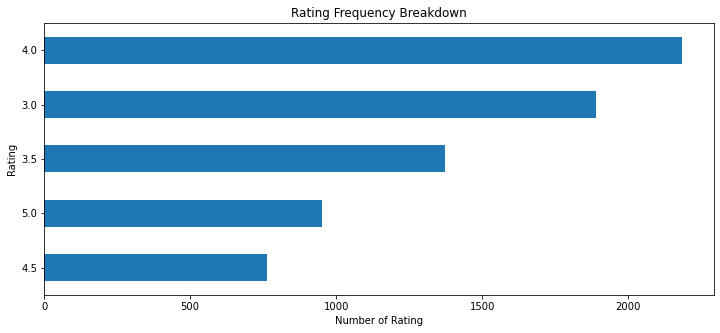

In [119]:

ax = df_cln2['rating'].value_counts().plot.barh(figsize=(12,5))
ax.invert_yaxis()

ax.set_ylabel('Rating')
ax.set_xlabel('Number of Rating')
ax.set_title('Rating Frequency Breakdown')

plt.savefig('../Housing-Project/ratingfreg.png', bbox_inches='tight', dpi=300)

plt.show()


In [121]:
rat_count = pd.DataFrame(df_cln2.groupby(['rating']).size(), columns=['count'])


In [133]:
# rat_count.sort_values(by='count', ascending=False).head()
rat_count.head()

,count
rating,
3.0,1889
3.5,1372
4.0,2184
4.5,763
5.0,951


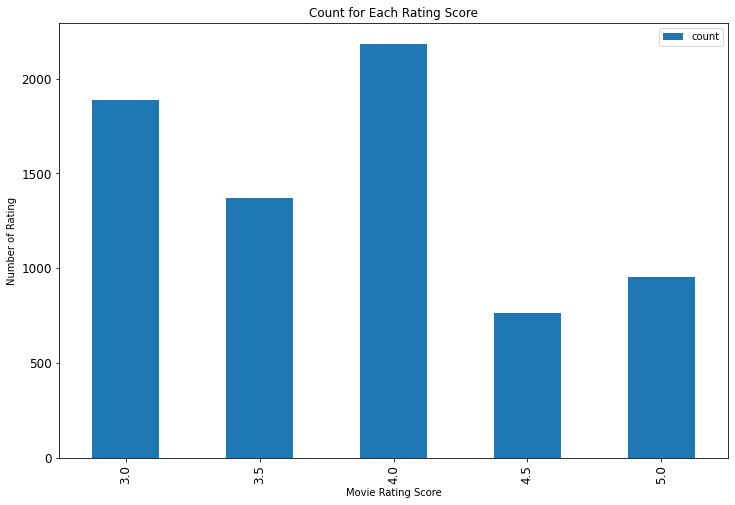

In [135]:
ax = rat_count.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel('Movie Rating Score')
ax.set_ylabel('Number of Rating')
ax.set_title('Count for Each Rating Score')

plt.savefig('../Housing-Project/ratingfreg.png', bbox_inches='tight', dpi=300)

plt.show()


- ### Average Rating by Top 10 Users

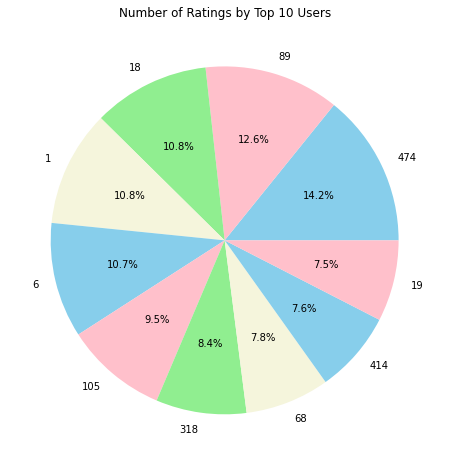

In [158]:
# Grouping the users and rating columns
user_rat_count = df_cln2.groupby('userId')['rating'].count()

# Top 10 users by rating count
top_10_users = user_ratings_counts.sort_values(ascending=False)[:10]

# Define the colors for each gender
colors = ['skyblue', 'pink', 'lightgreen', 'beige']

plt.figure(figsize=(15, 8))
plt.pie(top_10_users.values, labels=top_10_users.index, colors=colors, autopct='%1.1f%%')
plt.title('Number of Ratings by Top 10 Users')
plt.savefig('../Housing-Project/piechart.png', bbox_inches='tight', dpi=300)


<Figure size 432x288 with 0 Axes>

- ### Average Rating by Top 100 Users

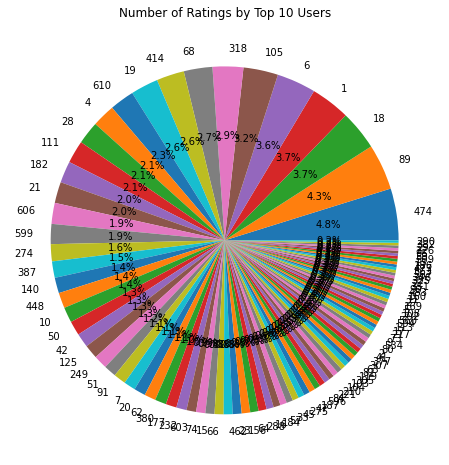

In [147]:
user_ratings_counts = df_cln2.groupby('userId')['rating'].count()

# get the top 100 users by rating count.
top_100_users = user_ratings_counts.sort_values(ascending=False)[:100]


# create a pie chart of the user rating counts for the top 100 users

plt.figure(figsize=(15, 8))
plt.pie(top_100_users.values, labels=top_100_users.index, autopct='%1.1f%%')
plt.title('Number of Ratings by Top 10 Users')
plt.savefig('../Housing-Project/piechart.png', bbox_inches='tight', dpi=300)

plt.show()

In [92]:
# Pie chart of rating feature

rating = df_cln2['rating'].value_counts()
transuction = rating.index
quantity = rating.values

# define the colors for each gender
colors = ['skyblue', 'pink', 'lightgreen', 'beige']

# draw pie circule with plotly
figure = px.pie(df_cln2,
               values = quantity,
               names = transuction,
                labels=rating.index,
                hole = .1,
                color_discrete_sequence=colors,
               title = 'Movie Rating Score Distribution (Rating >= 3.0)')

figure.show()

- ### Top 10 Genres based on Average Rating

- ### Average Rating by Top 10 Users

In [ ]:
genre_mean = df_cln2.groupby('users')['avg rating'].mean().sort_values(ascending=False)
top_genre_10 = df_cln2[:10].sort_values(by='users', ascending=False)
plt.figure(figsize=(8,4))

top_genre_10.plot(kind='barh', color='red')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.title('Average Rating by Genres')

# add labels to the bars
for i, mean in enumerate(genre_mean):
    plt.text(mean+0.1, i, str(round(mean, 2)), va='center', fontsize=10)
plt.show()


## #  Count of Movie by Years

In [101]:
# Create a bar chart to visualize the count of decades

years = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
labels = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
#year_count = years.value_counts()

# Create the most number of viewers based on the years
df_cln2['years'] = pd.cut(df_cln2[''])

fig, ax = plt.subplots(figsize=(15, 8))
year_count.plot(kind='bar', color='purple')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Count of Movie by Years')
z
# add labels to the bars
for i, count in enumerate(year_count):
    plt.text(i, count+10, str(count), ha='center', fontsize=8)
plt.show()

KeyError: ''

- ## The Top 10 Title based on Average Rating

In [95]:

top_title_10 = avg_h_rated.sort_values(by = 'avg rating', ascending=False).head(10)
top_title_10.head(10)

,title,avg rating
0,Larry David: Curb Your Enthusiasm (1999),5.0
227,Advise and Consent (1962),5.0
225,Tom Segura: Mostly Stories (2016),5.0
224,"Pompatus of Love, The (1996)",5.0
223,"Newton Boys, The (1998)",5.0
222,"Zed & Two Noughts, A (1985)",5.0
221,Paper Birds (Pájaros de papel) (2010),5.0
220,Tom Segura: Completely Normal (2014),5.0
219,Deathgasm (2015),5.0
218,Come and See (Idi i smotri) (1985),5.0


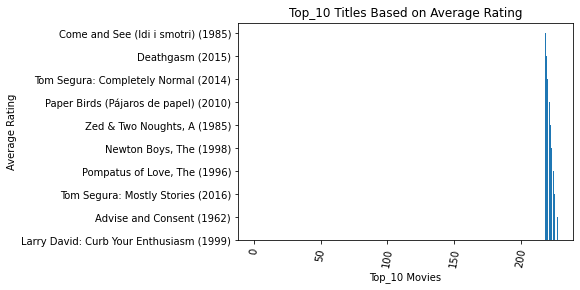

In [103]:
# Top 10 Titles based on Averagerating

fig, ax = plt.subplots()
ax.bar(x= top_title_10.index, height= top_title_10['title'])
plt.title('Top_10 Titles Based on Average Rating')
ax.set_xlabel('Top_10 Movies')
ax.set_ylabel('Average Rating')


# plt.savefig("top_10.png", transparent = True, dpi=150)

plt.xticks(rotation=80);
plt.show()

In [1]:
ddfa

NameError: name 'ddfa' is not defined

In [68]:
# Now the idea is to recommend items to a user based on what similar users have enjoyed. 
# Suppose we have the following recording of explicit ratings of five items by three users